### CSE 460: Deep RL Lab
Spring-2022, Dept. of CSE, NEUB <br>

#### Student Info
<b>Name:</b> Syed Md. Afsani<br>
<b>Reg. No:</b> 190103020001

### Assignment 5: CNN

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<b>2D convolution</b><br>
Kernel W shape: (hxw) <br>

$$y_{ij}=\sum_{k=0}^h \sum_{l=0}^w  X_{i+k,j+l}*w_{kl} $$ 


Output shape:<br>
Let, Input shape: X: (HxW) <br>
     Kernel shape: W: (hxw) <br>
     Output shape: y: (hhxww)<br>

output height would be, 
$$hh = \frac{H-h +2*pad}{stride}+1$$

Let, padding, pad=0 , filter size, hxw=(5x5), stride=1 and Input size: (28x28)<br>
So, $$hh = \frac{28-5+2*0}{1}+1=24$$
Similarly, 
$$ww = \frac{28-5+2*0}{1}+1=24$$

<b>Task 1: 2D convolution (hxwx1) </b> <br>
calculate output. <br>
Output should like below,<br><br>
[[ 100.   30.  -50.  -94.]<br>
 [ -50.  -50.  -10.  -85.]<br>
 [-230.   60.   30. -156.]<br>
 [-240.  140.  128. -189.]]

In [2]:
X=np.array([[10,10,20,0,0, 4], [0, 0,50,50,20, 0], [10,60,0,0,30, 2], [120,20,40,40,0, 1], [70, 0,10,80,90, 0], [40, 40,0,0,8,10]])
K=np.array([[-1,0, 1],[-2,0,2], [-1,0,1]])
print(X)
print('kernel:')
print( K)

[[ 10  10  20   0   0   4]
 [  0   0  50  50  20   0]
 [ 10  60   0   0  30   2]
 [120  20  40  40   0   1]
 [ 70   0  10  80  90   0]
 [ 40  40   0   0   8  10]]
kernel:
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]


In [7]:
hh = int(1 + ((len(X) - len(K)) + 2 * 0)/1)
result_Y = np.zeros((hh,hh))

for i in range(hh):
    for j in range(hh):
        sum = 0
        for k in range(len(K)):
            for l in range(len(K)):
                sum += (X[i+k][j+l] * K[k][l])
        result_Y[i][j] = sum
print(result_Y)

[[ 100.   30.  -50.  -94.]
 [ -50.  -50.  -10.  -85.]
 [-230.   60.   30. -156.]
 [-240.  140.  128. -189.]]


<b>Task 2: ReLU</b><br>
$$y=max(0,x)$$

[[100.,  30.,   0.,   0.],<br>
[  0.,   0.,   0.,   0.],<br>
[  0.,  60.,  30.,   0.],<br>
[  0., 140., 128.,   0.]]

In [9]:
relu = np.copy(result_Y)
sx, sy = relu.shape
for i in range(sx):
    for j in range(sy):
        relu[i][j] = max(0, relu[i][j])
print(relu)

[[100.  30.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.  60.  30.   0.]
 [  0. 140. 128.   0.]]


<b>Task 3: MaxPooling</b><br>
Pool size=2, stride=2<br>
    
output should like below,<br>
[[100. 0.] <br>
 [140. 128.]] 

In [10]:
pool_size=2
stride = 2
w=len(result_Y)
w1 = int((w - pool_size)/stride) + 1
max_pool = np.zeros((w1,w1))
k=0
for i in range(0, w, stride):
    l=0
    for j in range(0, w, stride):
        subarr = relu[i:i+pool_size, j:j+pool_size]
        max_pool[k][l] = subarr.max()
        l+=1
    k+=1

print(max_pool)

[[100.   0.]
 [140. 128.]]


<b>Task 4: Feature extraction (hxwx1)</b>
1. Load <b>lena.png</b> and plot the image.
2. apply convolution and plot the output (use the filter used above)
3. apply relu and plot the output
4. apply maxpool and plot the output.

<b>Import OpenCV python library</b><br>
Install if necessary. [Link](https://pypi.org/project/opencv-python/)

In [11]:
import cv2

In [12]:
org = cv2.imread('lena.png')
org= cv2.cvtColor(org, cv2.COLOR_BGR2RGB) #for matplotlib

In [13]:
print('rgb image shape: ',org.shape)

rgb image shape:  (220, 220, 3)


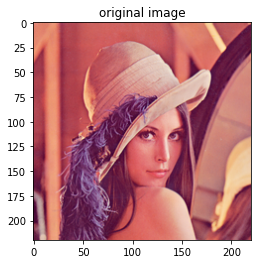

In [14]:
plt.imshow(org )
plt.title("original image")
plt.show()

In [15]:
X = cv2.cvtColor(org, cv2.COLOR_BGR2GRAY)
X.shap

(220, 220)

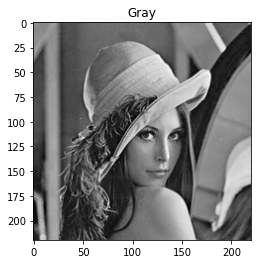

In [16]:
plt.imshow(X, cmap='gray')
plt.title("Gray")
plt.show()

In [17]:
filter=np.array([[-1,0, 1],[-2,0,2], [-1,0,1]])  #sobel filter.
print(filter)

[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]


In [24]:
#apply convolution
hh = int(1 + ((len(X) - len(filter)) + 2 * 0)/1)
Y = np.zeros((hh,hh))

for i in range(hh):
    for j in range(hh):
        sum = 0
        for k in range(len(filter)):
            for l in range(len(filter)):
                sum += (X[i+k][j+l] * K[k][l])
        Y[i][j] = sum
print(Y)

[[ -16.    2.    3. ...  166.  123. -108.]
 [ -10.    1.    2. ...   35.  -14. -133.]
 [  -2.   -1.    5. ... -125. -118.  -88.]
 ...
 [   5.   11.   33. ...   -4.   31.   63.]
 [   5.   16.   21. ...   38.   65.   58.]
 [   7.   15.   14. ...   76.   71.   32.]]


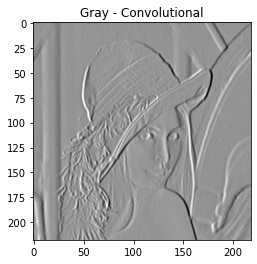

In [29]:
#plot
plt.imshow(Y, cmap='gray')
plt.title("Gray - Convolutional")
plt.show()

In [26]:
#apply relu
relu = np.copy(Y)
sx, sy = relu.shape
for i in range(sx):
    for j in range(sy):
        relu[i][j] = max(0, relu[i][j])
print(relu)

[[  0.   2.   3. ... 166. 123.   0.]
 [  0.   1.   2. ...  35.   0.   0.]
 [  0.   0.   5. ...   0.   0.   0.]
 ...
 [  5.  11.  33. ...   0.  31.  63.]
 [  5.  16.  21. ...  38.  65.  58.]
 [  7.  15.  14. ...  76.  71.  32.]]


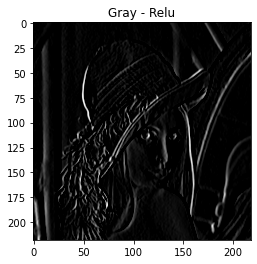

In [46]:
#plot
plt.imshow(relu, cmap="gray")
plt.title("Gray - Relu")
plt.show()

In [40]:
#apply maxpool
pool_size=2
stride = 2
w=len(relu)
w1 = int((w - pool_size)/stride) + 1
max_pool = np.zeros((w1,w1))
k=0
for i in range(0, w, stride):
    l=0
    for j in range(0, w, stride):
        subarr = relu[i:i+pool_size, j:j+pool_size]
        max_pool[k][l] = subarr.max()
        l+=1
    k+=1

print(max_pool)

[[  2.   3.   1. ...  15. 166. 123.]
 [  0.   8.   0. ...   0.   0.   0.]
 [  0.   5.   3. ...   0.   0.  17.]
 ...
 [ 61.  85. 318. ...   0.   0.   0.]
 [ 12.  46. 439. ...  22.   4.  63.]
 [ 16.  27. 489. ...  43.  76.  71.]]


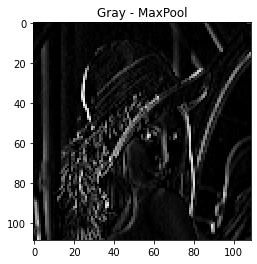

In [48]:
#plot
plt.imshow(max_pool, cmap='gray')
plt.title("Gray - MaxPool")
plt.show()

### Task 5: N channel 2d Conv

<img src='cnn_example.png' width=60%>

In [214]:
X=np.array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [1., 2., 1.],
        [1., 1., 2.],
        [1., 2., 0.],
        [2., 2., 1.],
        [1., 0., 2.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [2., 1., 2.],
        [2., 1., 2.],
        [2., 1., 1.],
        [1., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [2., 0., 1.],
        [1., 1., 2.],
        [0., 2., 0.],
        [2., 1., 1.],
        [1., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [2., 2., 2.],
        [1., 0., 0.],
        [0., 1., 1.],
        [2., 0., 2.],
        [1., 0., 2.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [2., 2., 0.],
        [1., 0., 0.],
        [2., 1., 2.],
        [1., 1., 2.],
        [0., 1., 1.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])
W=np.array([[[[-1., -1.,  0.],
         [-1.,  1.,  0.],
         [-1.,  1.,  1.]],

        [[ 0., -1.,  1.],
         [-1.,  1.,  0.],
         [ 1.,  0.,  0.]],

        [[ 0., -1.,  0.],
         [ 1.,  0.,  0.],
         [-1.,  1., -1.]]],


       [[[ 1.,  1.,  1.],
         [ 1.,  1.,  0.],
         [ 0., -1.,  1.]],

        [[-1., -1., -1.],
         [ 0., -1.,  0.],
         [-1.,  0.,  0.]],

        [[ 0.,  1.,  1.],
         [ 1.,  0., -1.],
         [ 1.,  0.,  1.]]]])
b=np.array([[[[1.]]],

       [[[0.]]]])

In [215]:
print('X:', X.shape)
print('W:', W.shape)
print('b:', b.shape)

X: (7, 7, 3)
W: (2, 3, 3, 3)
b: (2, 1, 1, 1)


In [216]:
b[0,:,:,0]

array([[1.]])

In [217]:
b[1,:,:,0]

array([[0.]])

In [218]:
X[:,:, 0]

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 2., 1., 0.],
       [0., 2., 2., 2., 1., 0., 0.],
       [0., 2., 1., 0., 2., 1., 0.],
       [0., 2., 1., 0., 2., 1., 0.],
       [0., 2., 1., 2., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

In [219]:
X[:,:,1]

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 2., 1., 2., 2., 0., 0.],
       [0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 1., 2., 1., 0., 0.],
       [0., 2., 0., 1., 0., 0., 0.],
       [0., 2., 0., 1., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

In [246]:
print(W[0, :, :, 0])
print(X[0:3, 2:5, 0])


array([[-1., -1., -1.],
       [ 0., -1.,  1.],
       [ 0.,  1., -1.]])

In [292]:
#write your code here.



[[[ -1.  -4.   7.]
  [  2.  -5.  -1.]
  [  9.   2.   8.]]

 [[  3.   5.   4.]
  [ -1.   7.   9.]
  [-10.   9.   4.]]

 [[-11.   3.   6.]
  [ -9.  -2.   4.]
  [ -9.  -1.   4.]]]
(3, 3, 3)
[[[0. 0. 7.]
  [2. 0. 0.]
  [9. 2. 8.]]

 [[3. 5. 4.]
  [0. 7. 9.]
  [0. 9. 4.]]

 [[0. 3. 6.]
  [0. 0. 4.]
  [0. 0. 4.]]]


In [124]:
np.sum( X[:,:, :][0:3, 0:3] * W[0 ] )

1.0

In [169]:
l = [[1, 2],[2, 3]]
print(l)

[[1, 2], [2, 3], 4]


In [125]:
np.sum(X[1:4, 1:4, 0] * W[0,:,:,0])

-2.0

<b>Task 6: Convolution on Image. Multi channel</b>
1. Apply convolution
2. Plot the 8 images

In [27]:
X=org.copy()
print('input image shape:',X.shape)

input image shape: (220, 220, 3)


In [31]:
n_C=8            #number of filters
n_C_prev=3       #number of channels in the input
f=5              #filter size
W=np.random.randn(n_C, f, f, n_C_prev)/9.0
print('filters shape:',W.shape)

filters shape: (8, 5, 5, 3)


In [32]:
print('output shape should be: 216x216x8')

output shape should be: 216x216x8


In [30]:
#Task apply convolution, draw the 8 outputs seperately. 